<br>
<h1 align="center">Data Visualization with Python pandas, matplotlib and seaborn</h1>
<h3 align="center">Andriy Gazin, Texty.org.ua</h3>
<h3 align="center">August 11, 2016</h3>
<br>

In [1]:
import pandas as pd

In [2]:
#read the data
weather = pd.read_csv("https://raw.githubusercontent.com/andriy-gazin/datasets/master/kyiv_weather_2015.csv", parse_dates = [0])

In [33]:
#inspect the data
weather.head()

,date,temp,dew_pt,hum,wind_spd,wind_gust,dir,vis,pressure,wind_chill,...,cond,fog,rain,snow,hail,thunder,tornado,month,day,season
0,2015-01-01 00:00:00,-7,-14,58,21.6,NaN,WSW,10.0,1025.0,-14.3,...,Overcast,0,0,0,0,0,0,1,2015-01-01,winter
1,2015-01-01 00:30:00,-6,-13,58,21.6,NaN,West,10.0,1025.0,-13.1,...,Overcast,0,0,0,0,0,0,1,2015-01-01,winter
2,2015-01-01 01:00:00,-6,-13,58,25.2,NaN,West,10.0,1025.0,-13.6,...,Overcast,0,0,0,0,0,0,1,2015-01-01,winter
3,2015-01-01 01:30:00,-6,-13,58,21.6,NaN,West,10.0,1024.0,-13.1,...,Overcast,0,0,0,0,0,0,1,2015-01-01,winter
4,2015-01-01 02:00:00,-5,-14,40,14.4,NaN,West,20.0,1026.0,NaN,...,Mostly Cloudy,0,0,0,0,0,0,1,2015-01-01,winter


In [32]:
#extract month variavle
import datetime
weather['month'] = weather['date'].dt.month
weather['day'] = weather['date'].dt.date

In [5]:
#add season variable
def get_season(month):
    if month in [1, 2, 12]: return 'winter'
    elif month in [3, 4, 5]: return 'spring'
    elif month in [6, 7, 8]: return 'summer'
    elif month in [9, 10, 11]: return 'autumn'
    
weather['season'] = weather['month'].apply(get_season)

In [6]:
weather.dtypes

date          datetime64[ns]
temp                   int64
dew_pt                 int64
hum                    int64
wind_spd             float64
wind_gust            float64
dir                   object
vis                  float64
pressure             float64
wind_chill           float64
heat_index           float64
precip               float64
cond                  object
fog                    int64
rain                   int64
snow                   int64
hail                   int64
thunder                int64
tornado                int64
month                  int64
day                   object
season                object
dtype: object

# Histogram

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([   73.,   305.,   941.,  4199.,  4153.,  3369.,  3084.,  2985.,
         1410.,   382.]),
 array([-19. , -13.6,  -8.2,  -2.8,   2.6,   8. ,  13.4,  18.8,  24.2,
         29.6,  35. ]),
 <a list of 10 Patch objects>)

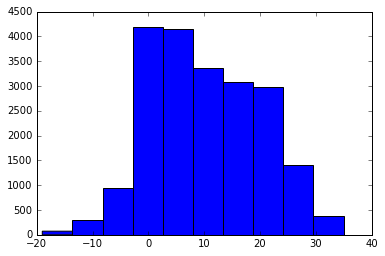

In [8]:
plt.hist(x = weather['temp'])

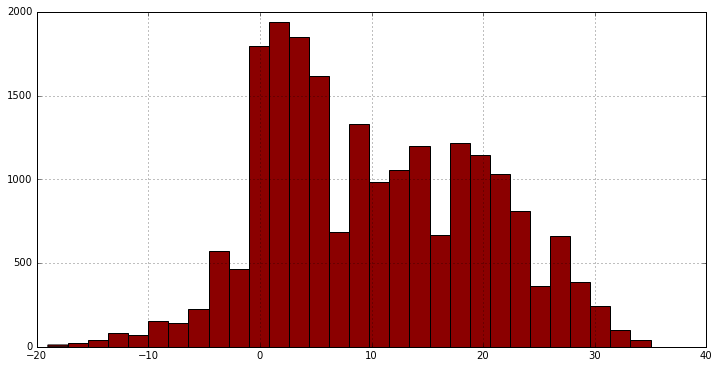

In [9]:
#adjust number of bins
plt.figure(figsize = (12, 6))
plt.hist(x = weather['temp'], bins = 30, color = 'darkred')
plt.grid()

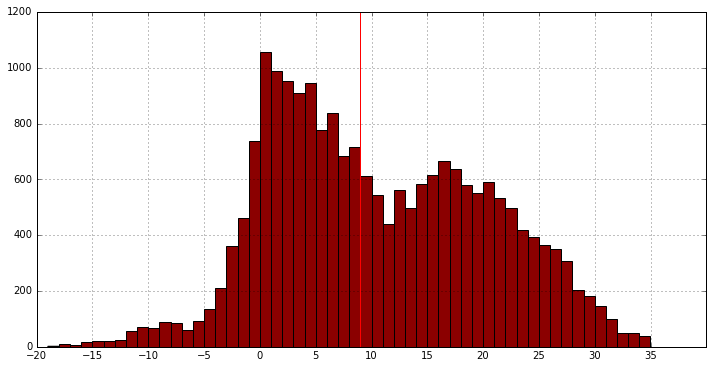

In [10]:
#adjust binwidth
plt.figure(figsize = (12, 6))
plt.hist(x = weather['temp'], bins = range(min(weather['temp']), max(weather['temp'])+1, 1), color = 'darkred')
plt.vlines(weather.temp.median(), ymin = 0, ymax = 1200, linestyles = 'solid', colors = 'red')
plt.xticks(range(-20, 40, 5))
plt.grid()

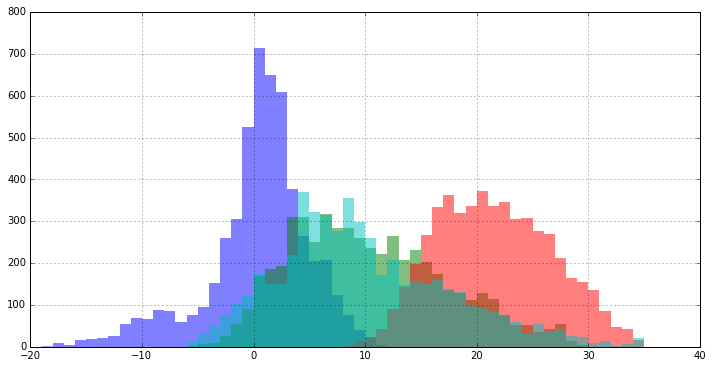

In [124]:
plt.figure(figsize = (12, 6))
for season in weather.season.unique():
    plt.hist(weather[weather.season == season].temp, 
             bins = range(min(weather['temp']), max(weather['temp'])+1, 1), edgecolor = 'none', alpha = 0.5)
plt.grid()

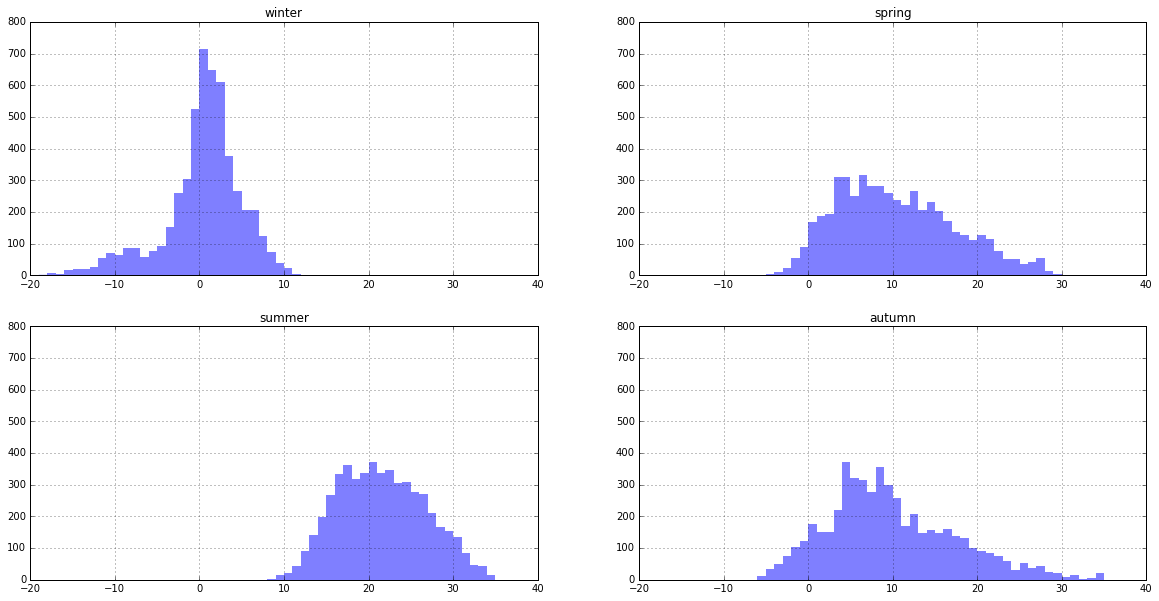

In [208]:
#create separate histogram for every season
plt.figure(figsize = (20, 10))
for i in range(0, len(weather.season.unique())):
        plt.subplot(2, 2, i+1)
        plt.hist(weather[weather.season == weather.season.unique()[i]].temp, 
                 bins = range(min(weather['temp']), max(weather['temp'])+1, 1), 
                 edgecolor = 'none', alpha = 0.5)
        plt.title(weather.season.unique()[i])
        plt.ylim(0, 800)
        plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86ca19a630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f86cb249320>]], dtype=object)

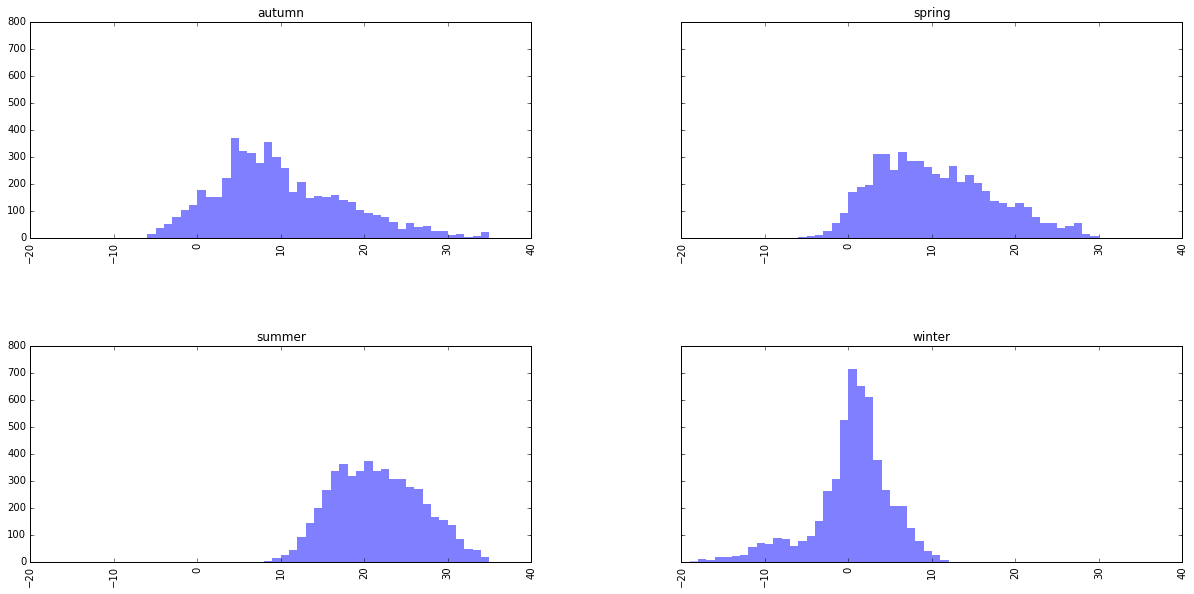

In [209]:
#do it with pandas
weather.hist(column = 'temp', by = 'season', 
             bins = range(min(weather['temp']), max(weather['temp'])+1, 1), 
             edgecolor = 'none', alpha = 0.5, figsize = (20, 10), sharey = True, layout = (2, 2), grid = True)

# boxplot

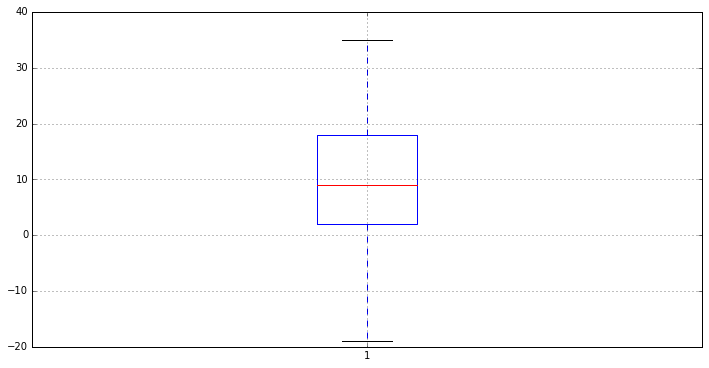

In [19]:
#create simple boxplot
plt.figure(figsize = (12, 6))
plt.boxplot(weather.temp)
plt.grid()
plt.show()

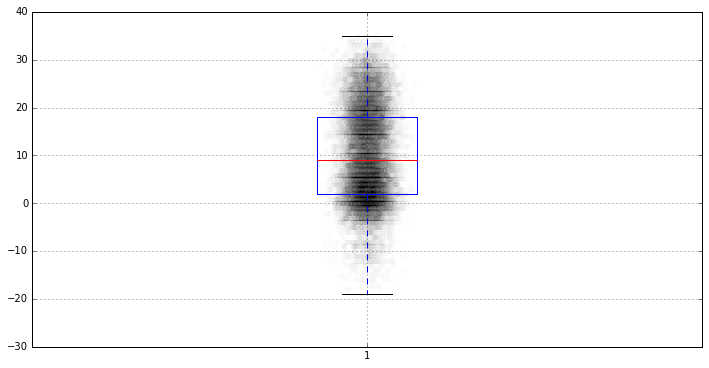

In [13]:
#add jitter points
import numpy as np
plt.figure(figsize = (12, 6))
plt.boxplot(weather.temp)
y = weather.temp
x = np.random.normal(1, 0.02, size=len(y))
plt.scatter(x = x, y = y, alpha = 0.01, c = 'grey')
plt.grid()
plt.show()

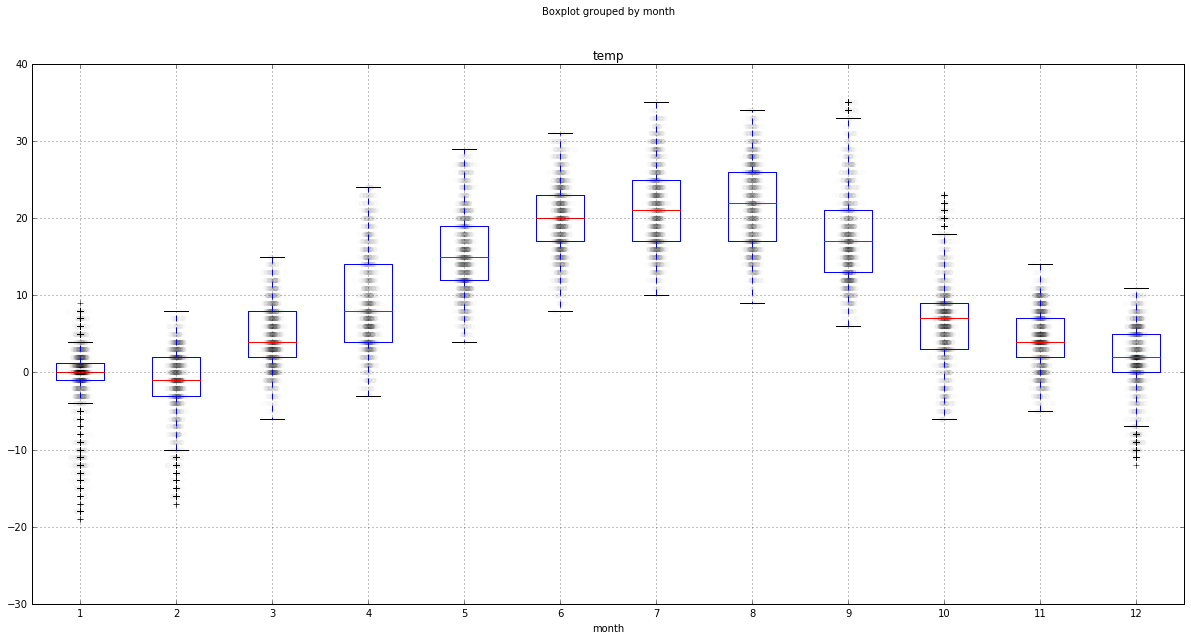

In [125]:
#temp distribution by month with pandas & matplotlib
plt.rcParams['figure.figsize'] = [20, 10]
weather.boxplot(column= 'temp', by = 'month')
for i in range(1, 13):
    y = weather.temp[weather.month==i].dropna()
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x = x, y = y, alpha=0.01, c = 'grey')

# scatterplot

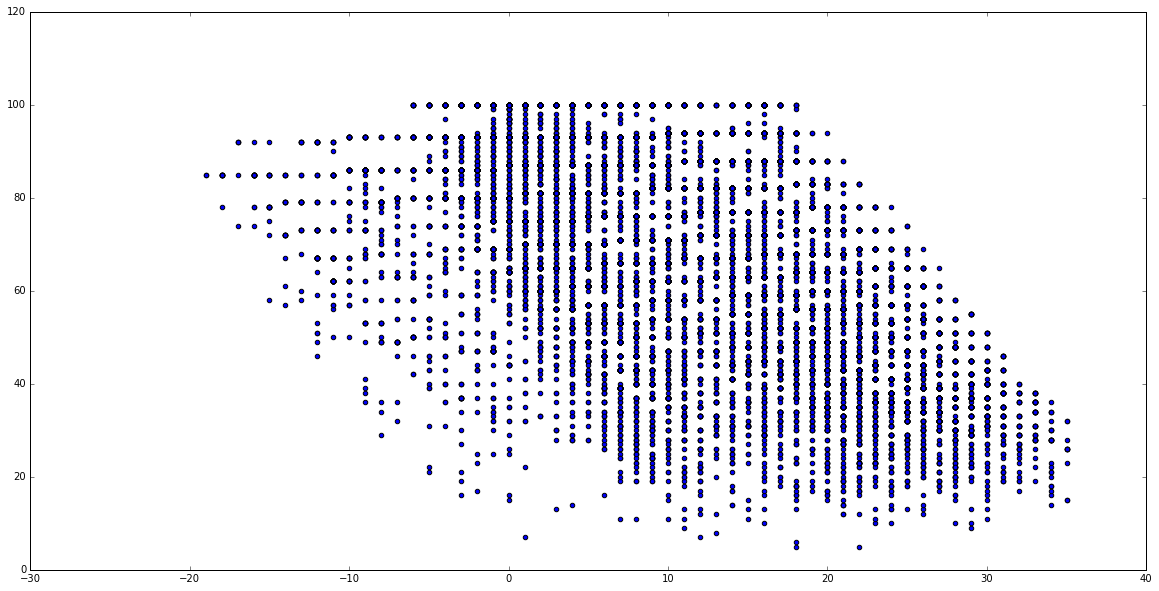

In [184]:
#create basic scatterplot
plt.scatter(weather.temp, weather.hum)

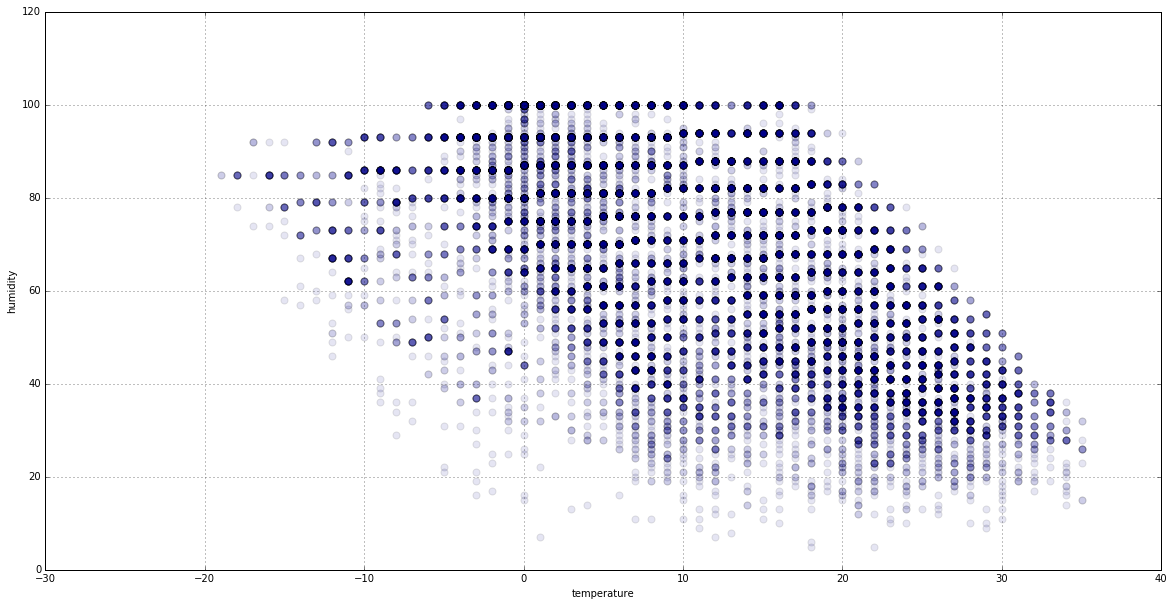

In [185]:
plt.scatter(weather.temp, weather.hum, marker = ".", alpha = 0.1, s = 200, c = 'darkblue')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.grid()

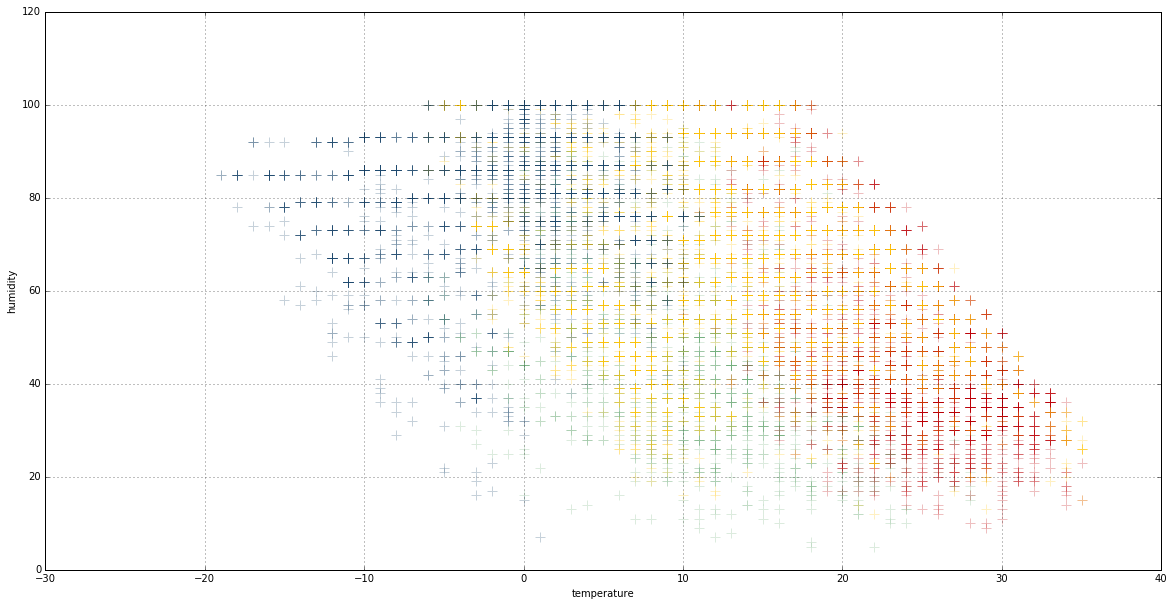

In [288]:
#color points by season
colors = {'winter':'#1F4A6F', 'spring':'#75B07F', 'summer':'#BD0006', 'autumn':'#FFC60C'}

plt.scatter(weather.temp, weather.hum, c = weather['season'].apply(lambda x: colors[x]), marker = '+', s = 100, alpha = 0.25)
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.grid()

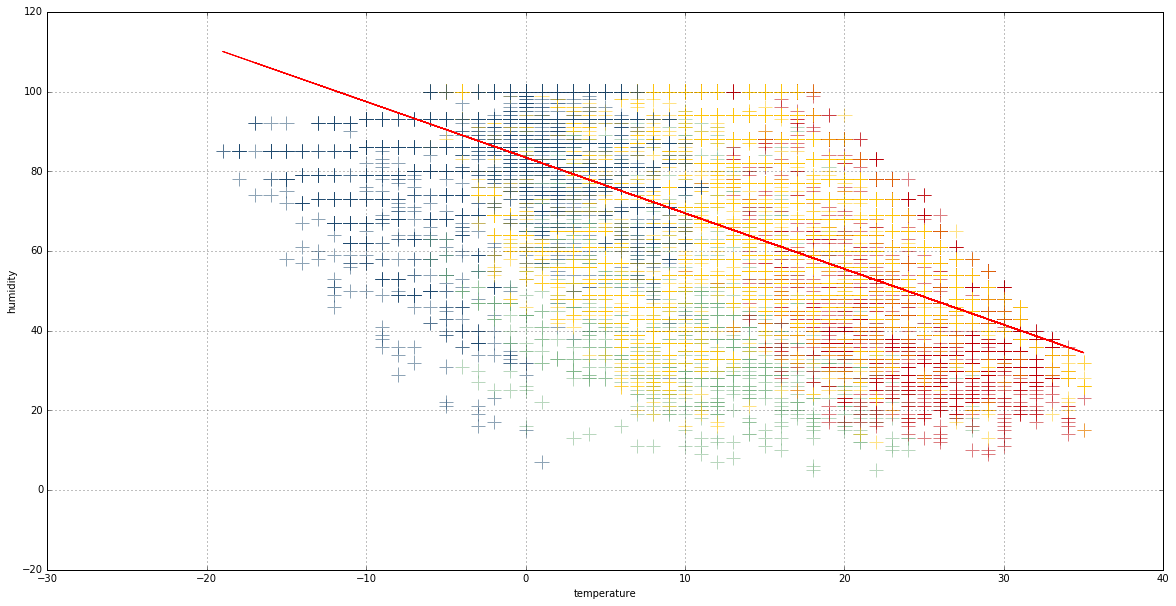

In [199]:
#add regression line
fit = np.polyfit(x = weather.temp, y = weather.hum, deg=1)

plt.scatter(weather.temp, weather.hum, c = weather['season'].apply(lambda x: colors[x]), marker = '+', s = 200, alpha = 0.5)
plt.plot(weather.temp, fit[0] * weather.temp + fit[1], color= 'red')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.grid()

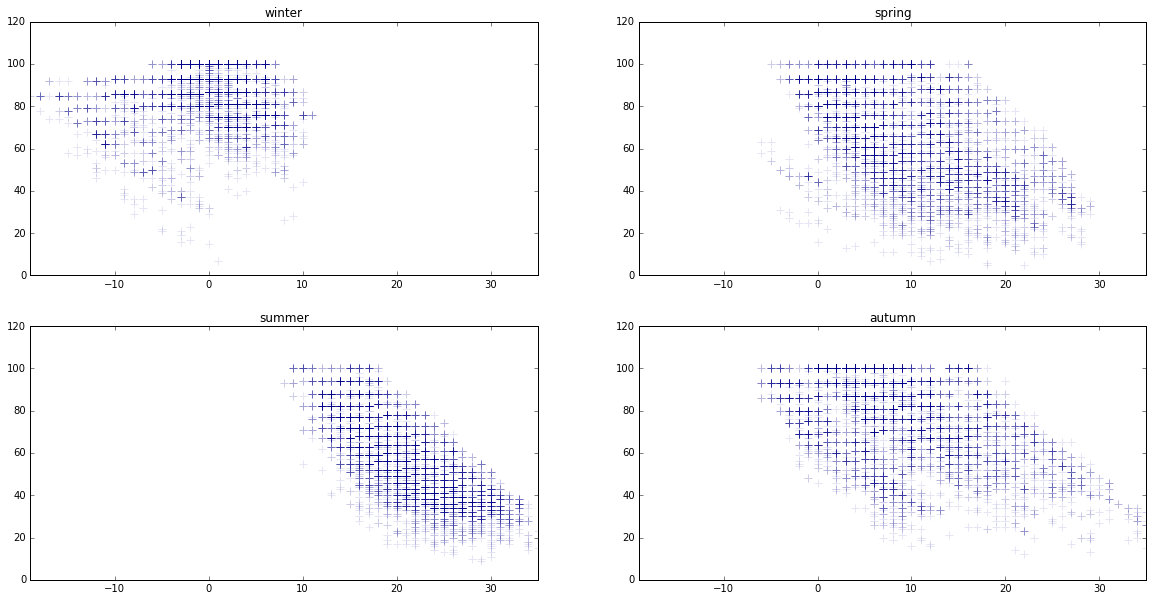

In [197]:
#separate plots for every season
for i in range(0, len(weather.season.unique())):
        plt.subplot(2, 2, i+1)
        plt.scatter(weather[weather.season == weather.season.unique()[i]].temp, 
                    weather[weather.season == weather.season.unique()[i]].hum,
                   c = 'darkblue', alpha = 0.1, s = 50, marker = '+')
        plt.title(weather.season.unique()[i])
        plt.xlim(min(weather.temp), max(weather.temp))

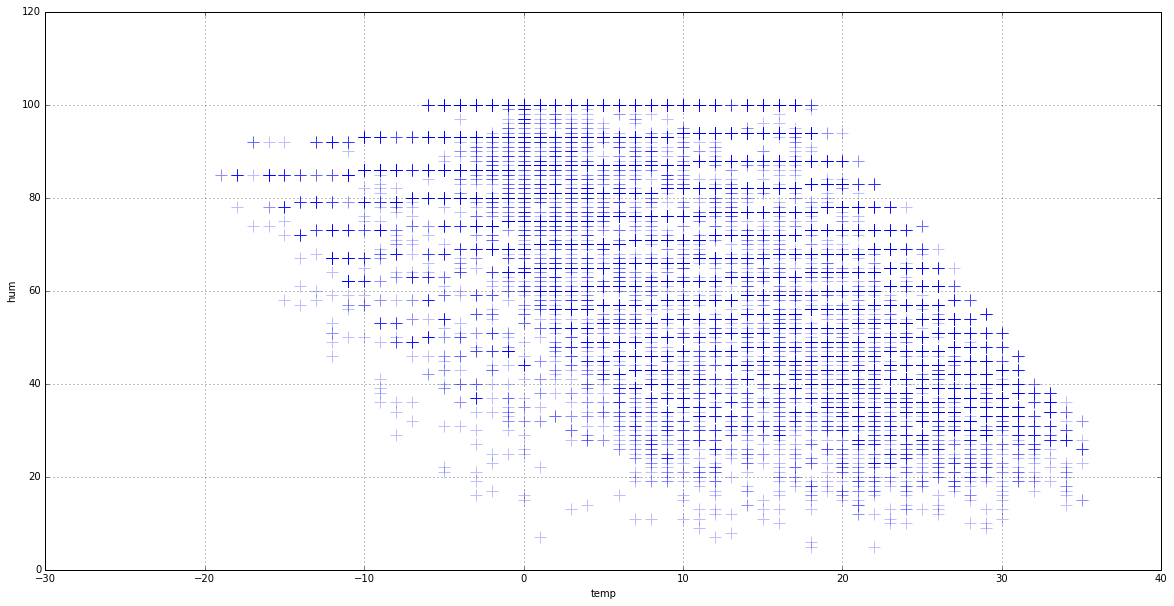

In [275]:
#same shit with pandas
weather.plot(x = 'temp', y = 'hum', kind = 'scatter', marker = '+', s = 150, alpha = 0.25, grid = True)

# linechart

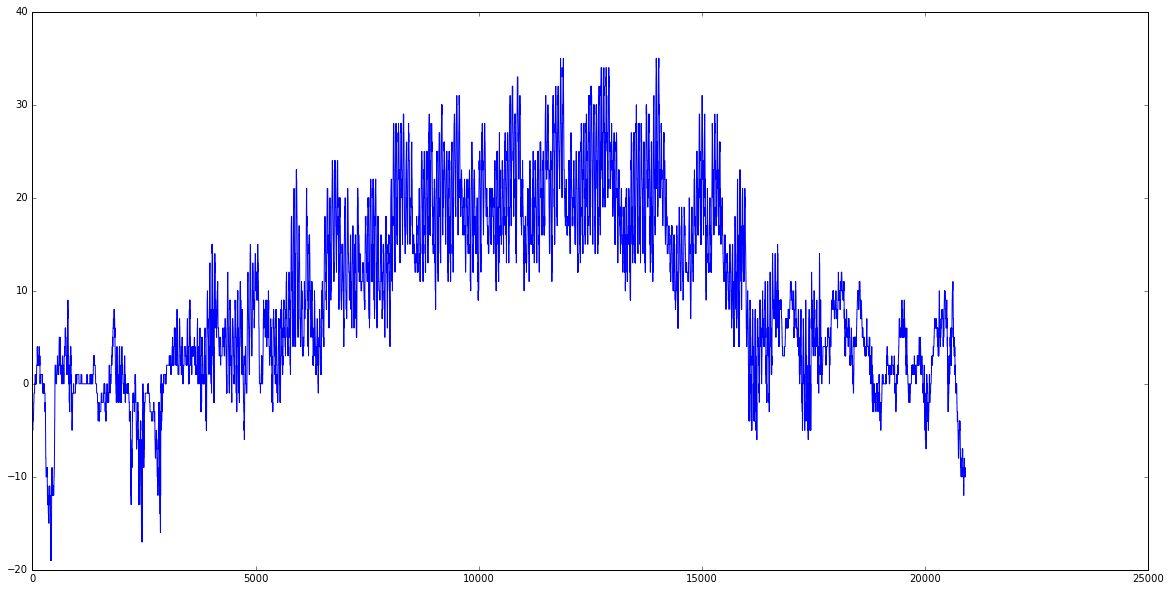

In [238]:
plt.plot(weather.temp)

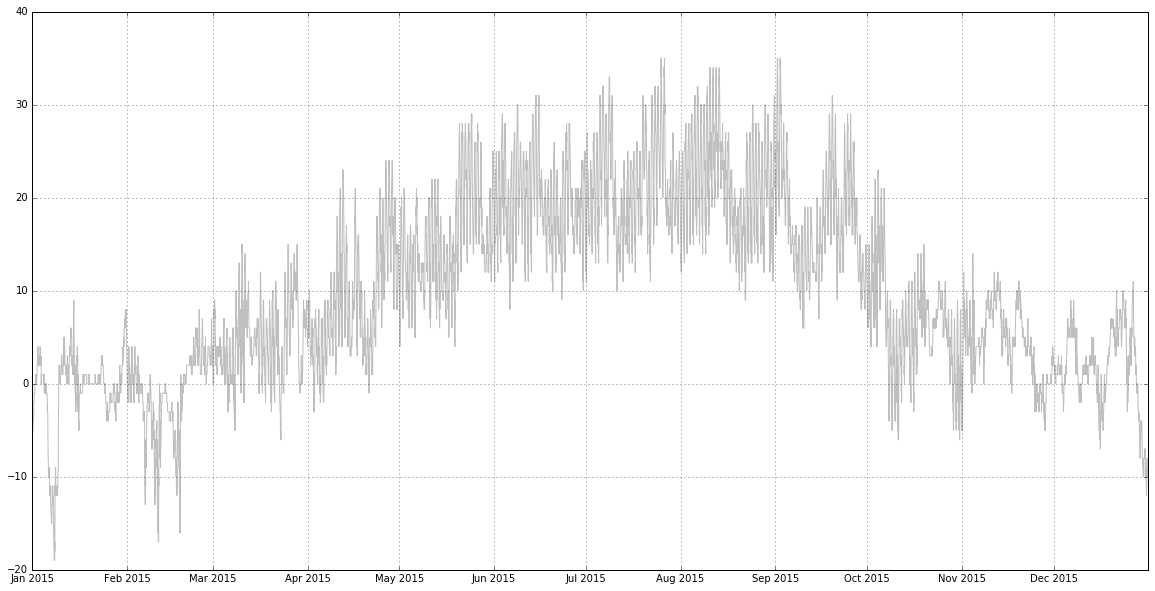

In [243]:
#change index column
weatherNew = weather
weatherNew.index = weatherNew.date
plt.plot(weatherNew.temp, c = 'gray', alpha = 0.5)
plt.grid()

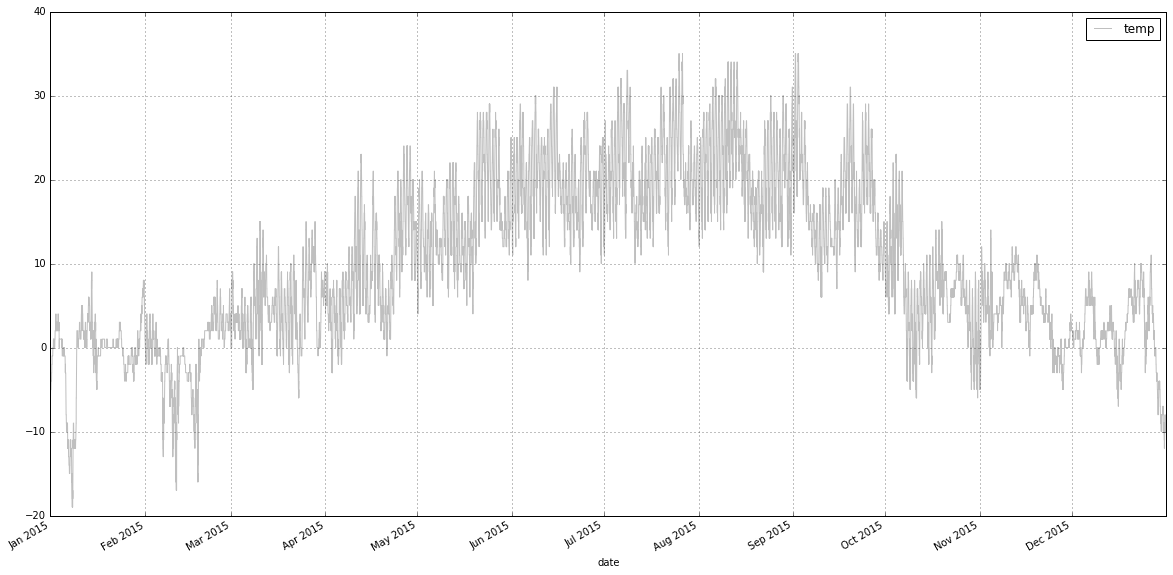

In [268]:
#default linechart with pandas
weather.plot('date', 'temp', grid = True, c = 'gray', alpha = 0.5)

In [ ]:
#add horizontal lines
weather.plot('date', 'temp', grid = True, c = 'gray', alpha = 0.5)
plt.hlines(y = weather.temp.min(), xmin = weather.date.min(), xmax = weather.date.max(), colors = 'darkred')
plt.hlines(y = weather.temp.max(), xmin = weather.date.min(), xmax = weather.date.max(), colors = 'darkblue')
plt.hlines(y = weather.temp.median(), xmin = min(weather.date), xmax = max(weather.date), colors = 'black')

# barchart

In [263]:
#summarise data and create horizontal barplot
conditions = weather.groupby('cond')['cond'].agg({'count':'count'}).sort_values(by = 'count', ascending = True)
conditions = conditions[conditions['count'] > 200]

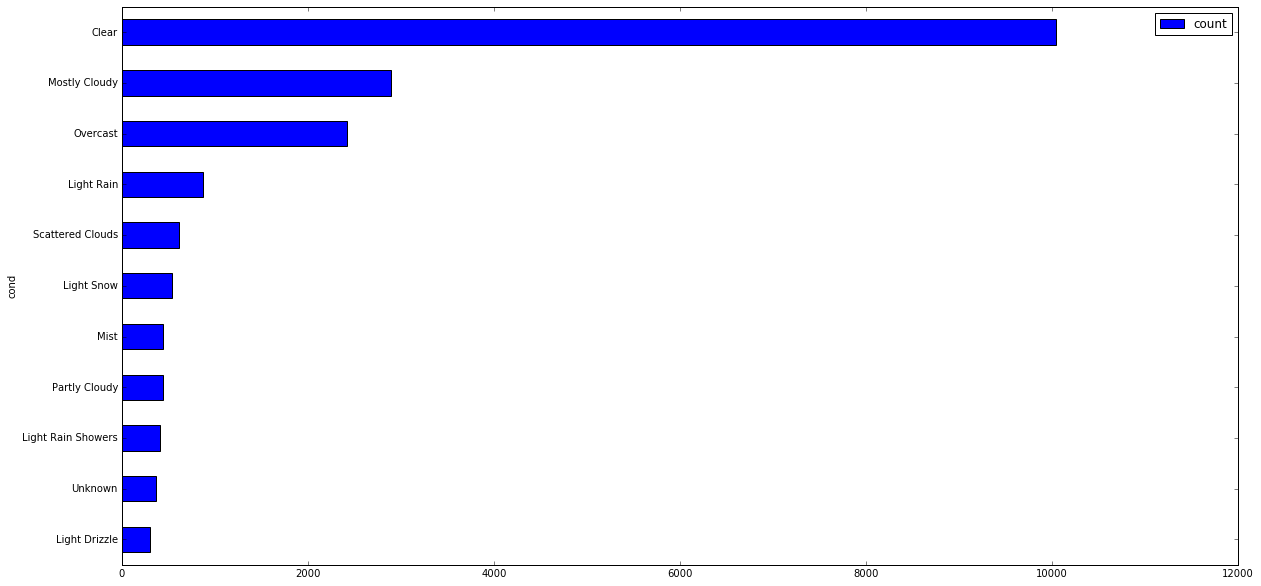

In [265]:
conditions.plot(kind = 'barh')

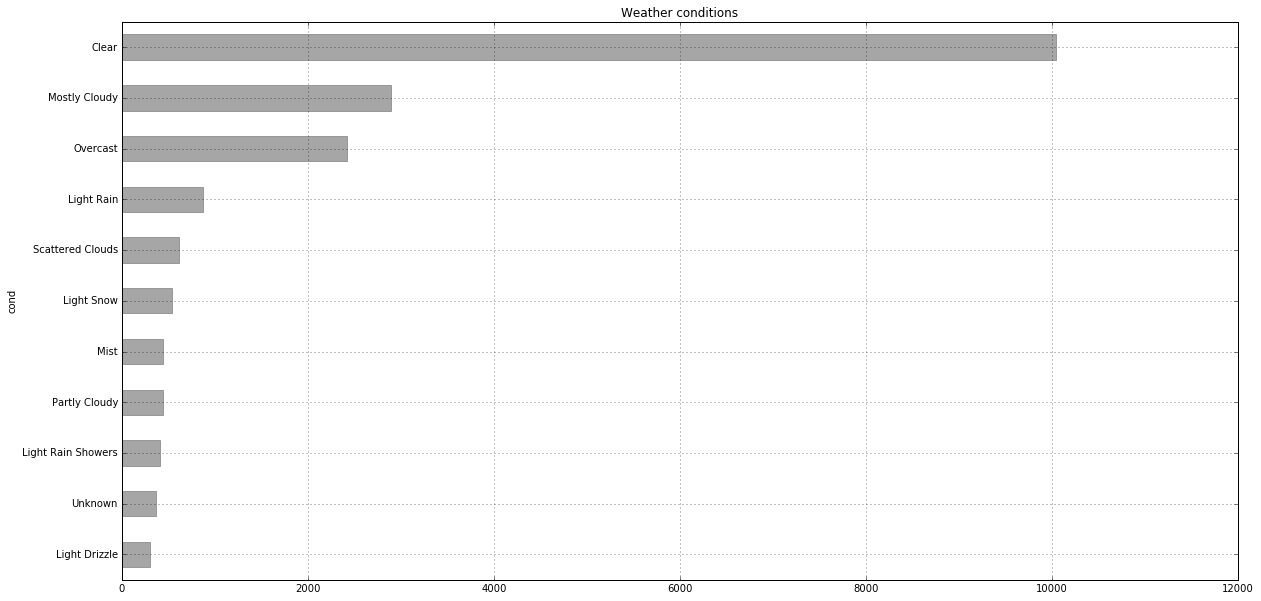

In [266]:
conditions.plot(kind = 'barh', grid = True, color = 'gray', alpha = 0.7, edgecolor = 'gray', legend = False)
plt.title('Weather conditions')

<h2>Styling matplotlib plot</h2>
* inline style in plot call
* global parameters
* predefined styles
* custom styles

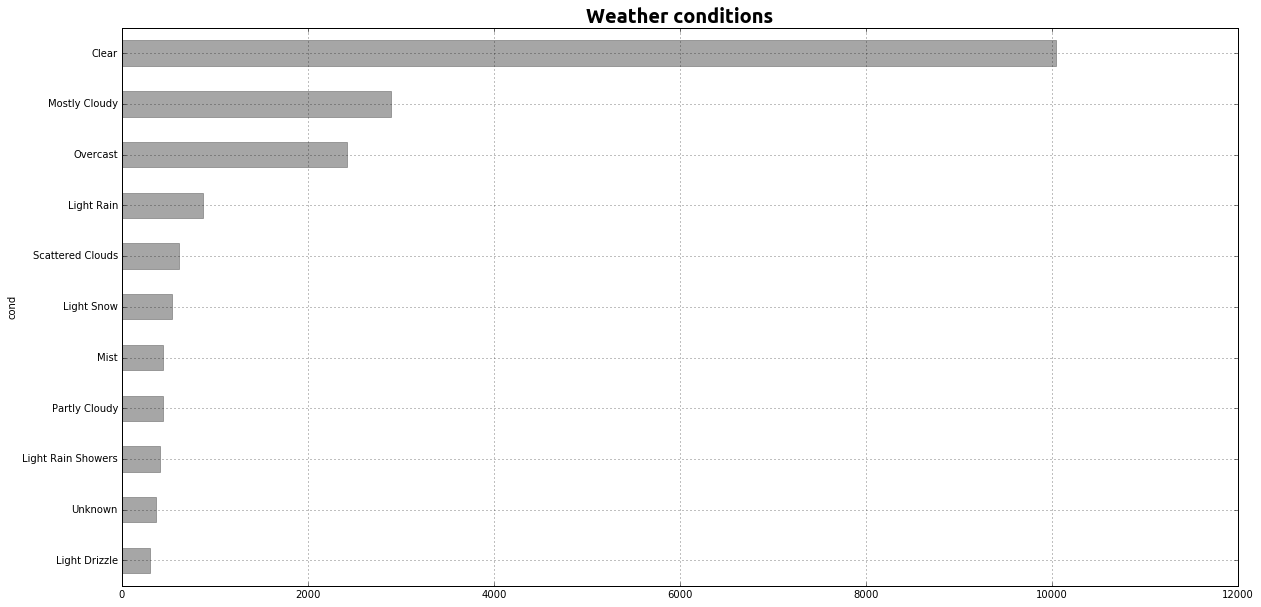

In [289]:
conditions.plot(kind = 'barh', grid = True, color = 'gray', alpha = 0.7, edgecolor = 'gray', legend = False)
plt.title('Weather conditions', fontsize = 20, family = 'Ubuntu', weight = 'bold')

In [ ]:
#define global parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.grid'] = True
#plt.rcParams

In [290]:
#use built-in styles
plt.style.available

['bmh',
 'seaborn-deep',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-ticks',
 'seaborn-pastel',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-paper',
 'seaborn-poster',
 'classic',
 'fivethirtyeight',
 'seaborn-talk']

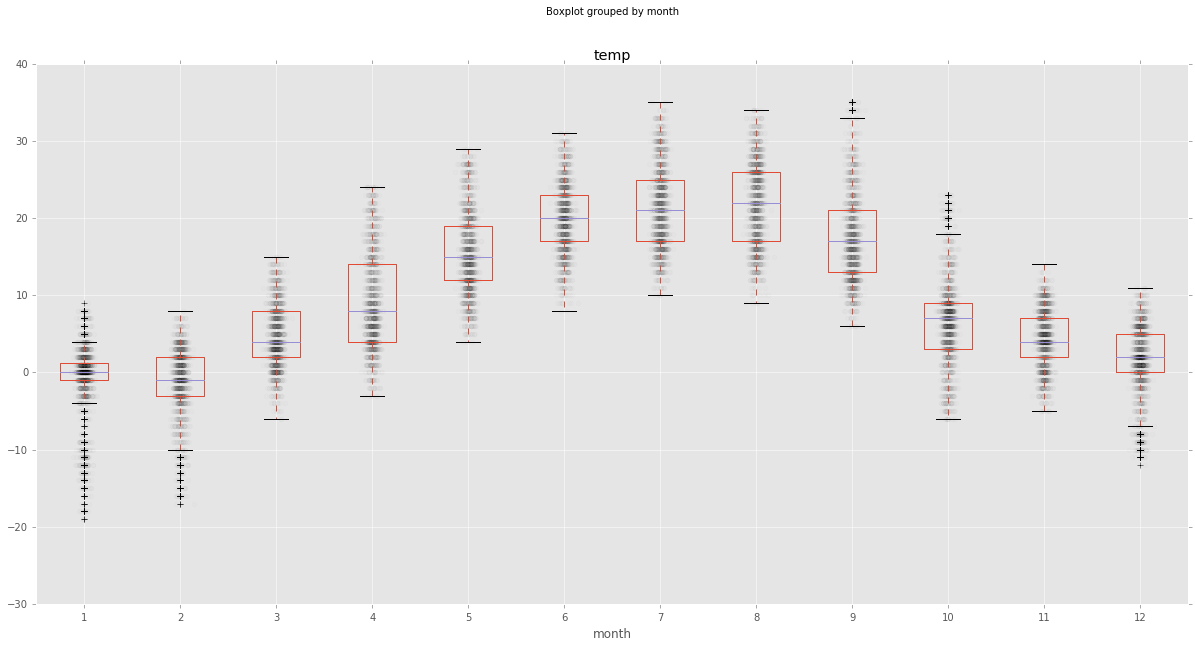

In [294]:
#use style locally
with plt.style.context(('ggplot')):
    weather.boxplot(column= 'temp', by = 'month')
for i in range(1, 13):
    y = weather.temp[weather.month==i].dropna()
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x = x, y = y, alpha=0.01, c = 'grey')

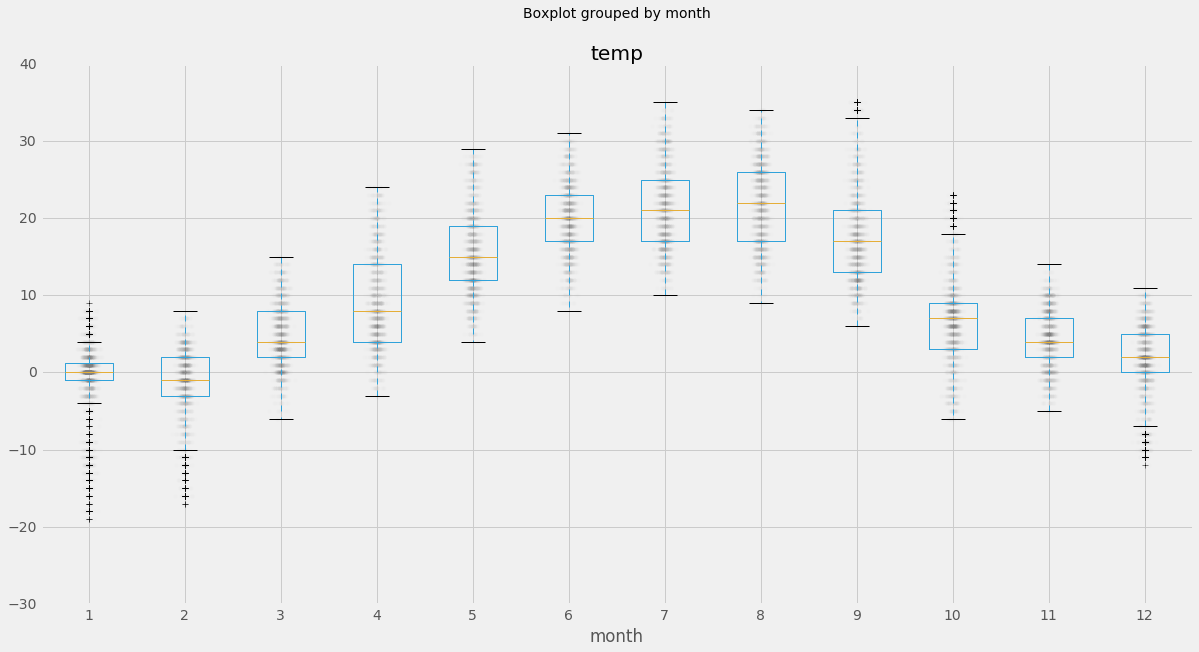

In [296]:
#use style globally
plt.style.use('fivethirtyeight')
weather.boxplot(column= 'temp', by = 'month')
for i in range(1, 13):
    y = weather.temp[weather.month==i].dropna()
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x = x, y = y, alpha=0.01, c = 'grey')

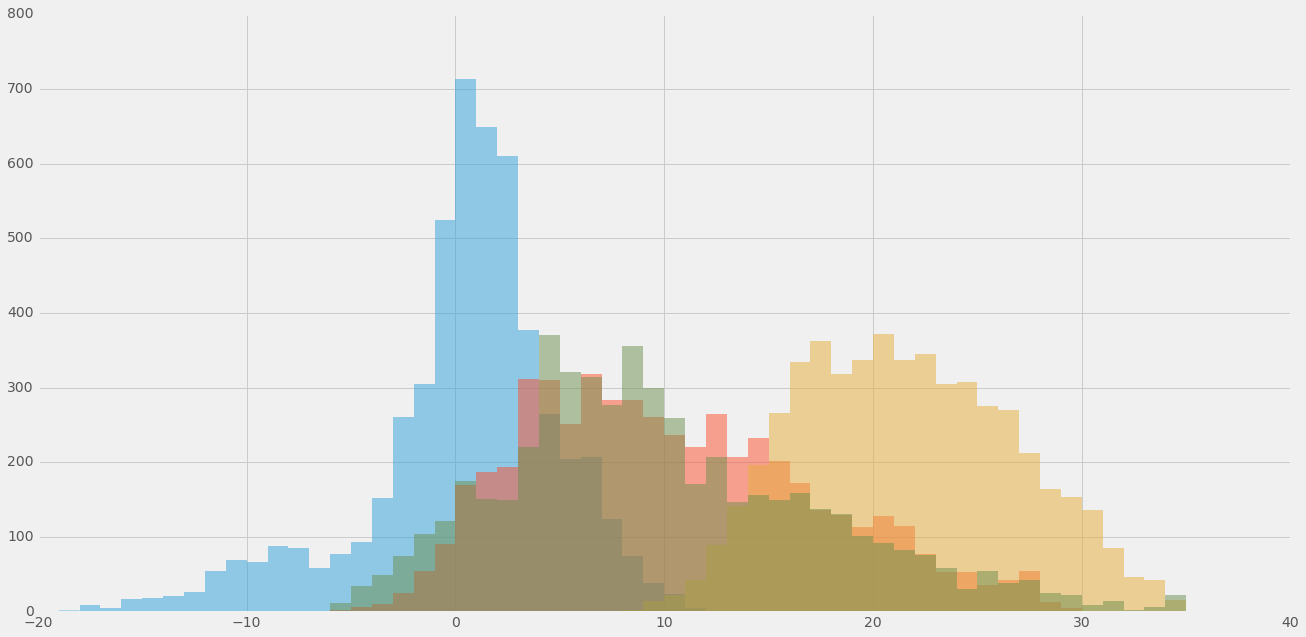

In [298]:
#result of using style globally
for season in weather.season.unique():
    plt.hist(weather[weather.season == season].temp, 
             bins = range(min(weather['temp']), max(weather['temp'])+1, 1), edgecolor = 'none', alpha = 0.5)

# using seaborn

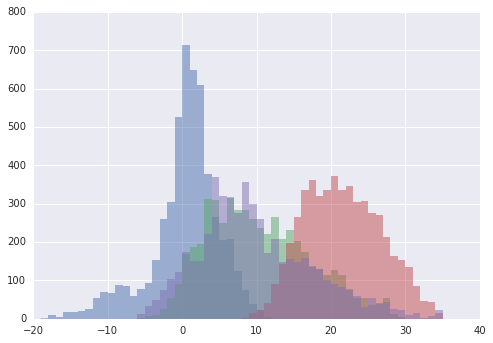

In [11]:
import seaborn as sns
for season in weather.season.unique():
    plt.hist(weather[weather.season == season].temp, 
             bins = range(min(weather['temp']), max(weather['temp'])+1, 1), edgecolor = 'none', alpha = 0.5)

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


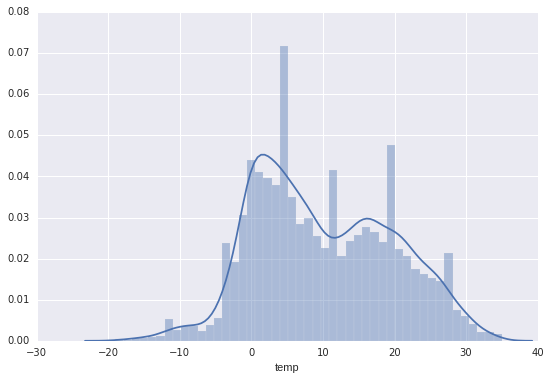

In [308]:
#default seaborn histogram
sns.distplot(weather.temp)

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


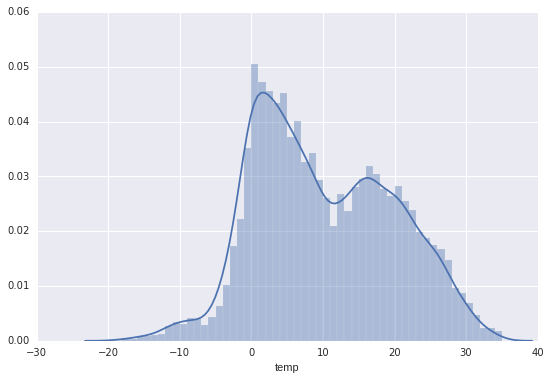

In [305]:
#adjust bins parameter
sns.distplot(weather.temp, bins = range(min(weather['temp']), max(weather['temp'])+1, 1))

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


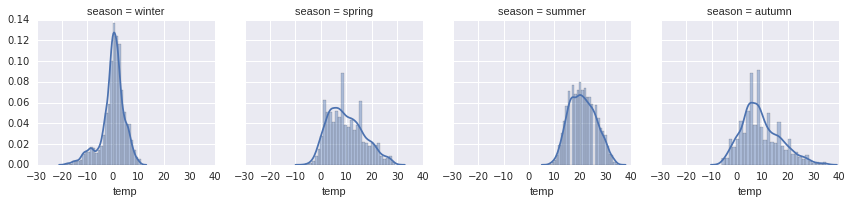

In [14]:
g = sns.FacetGrid(weather, col = 'season')
g = g.map(sns.distplot, 'temp', bins = 30)

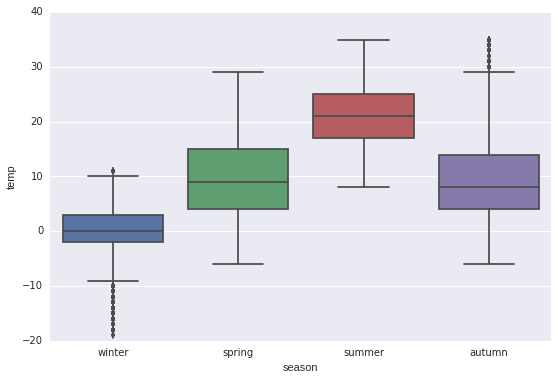

In [309]:
#default boxplot
sns.boxplot(x = weather.season, y = weather.temp)

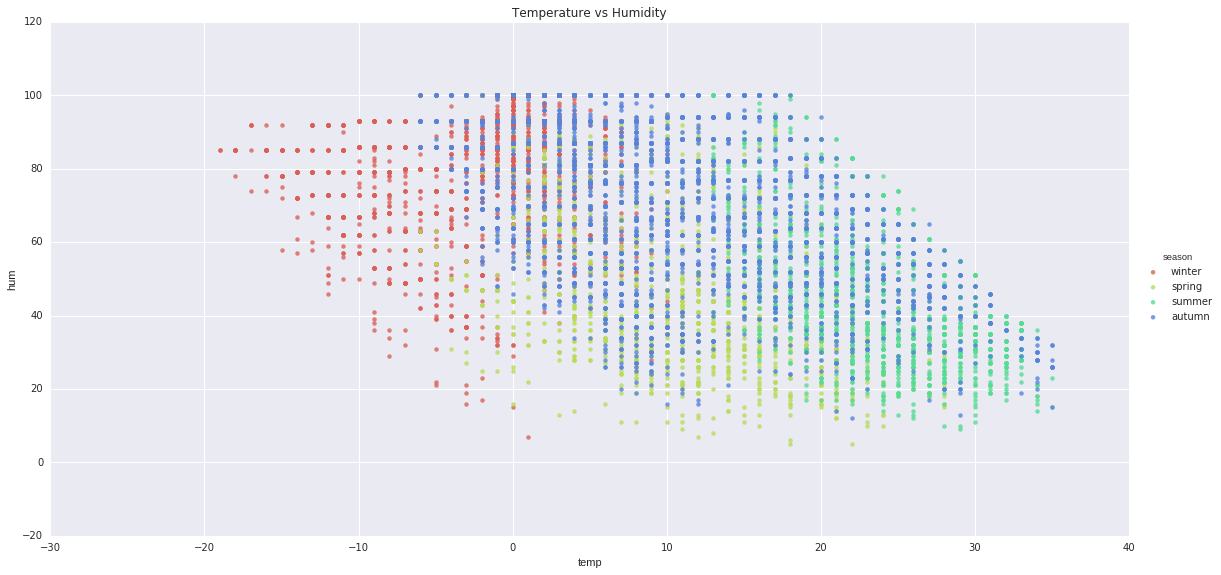

In [317]:
sns.set_palette("hls", 5)
sns.lmplot(x = 'temp', y = 'hum', hue = 'season', fit_reg = False, 
           data = weather, scatter_kws={'alpha':0.8}, size = 8, aspect = 2)
plt.title('Temperature vs Humidity')

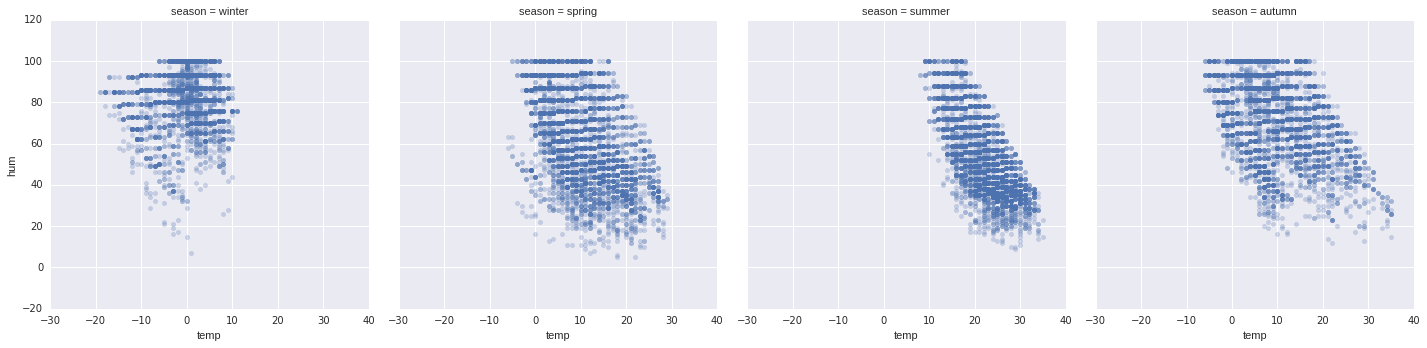

In [37]:
g = sns.FacetGrid(weather, col = 'season', size = 5)
g = g.map(plt.scatter, 'temp', 'hum', alpha = 0.25)

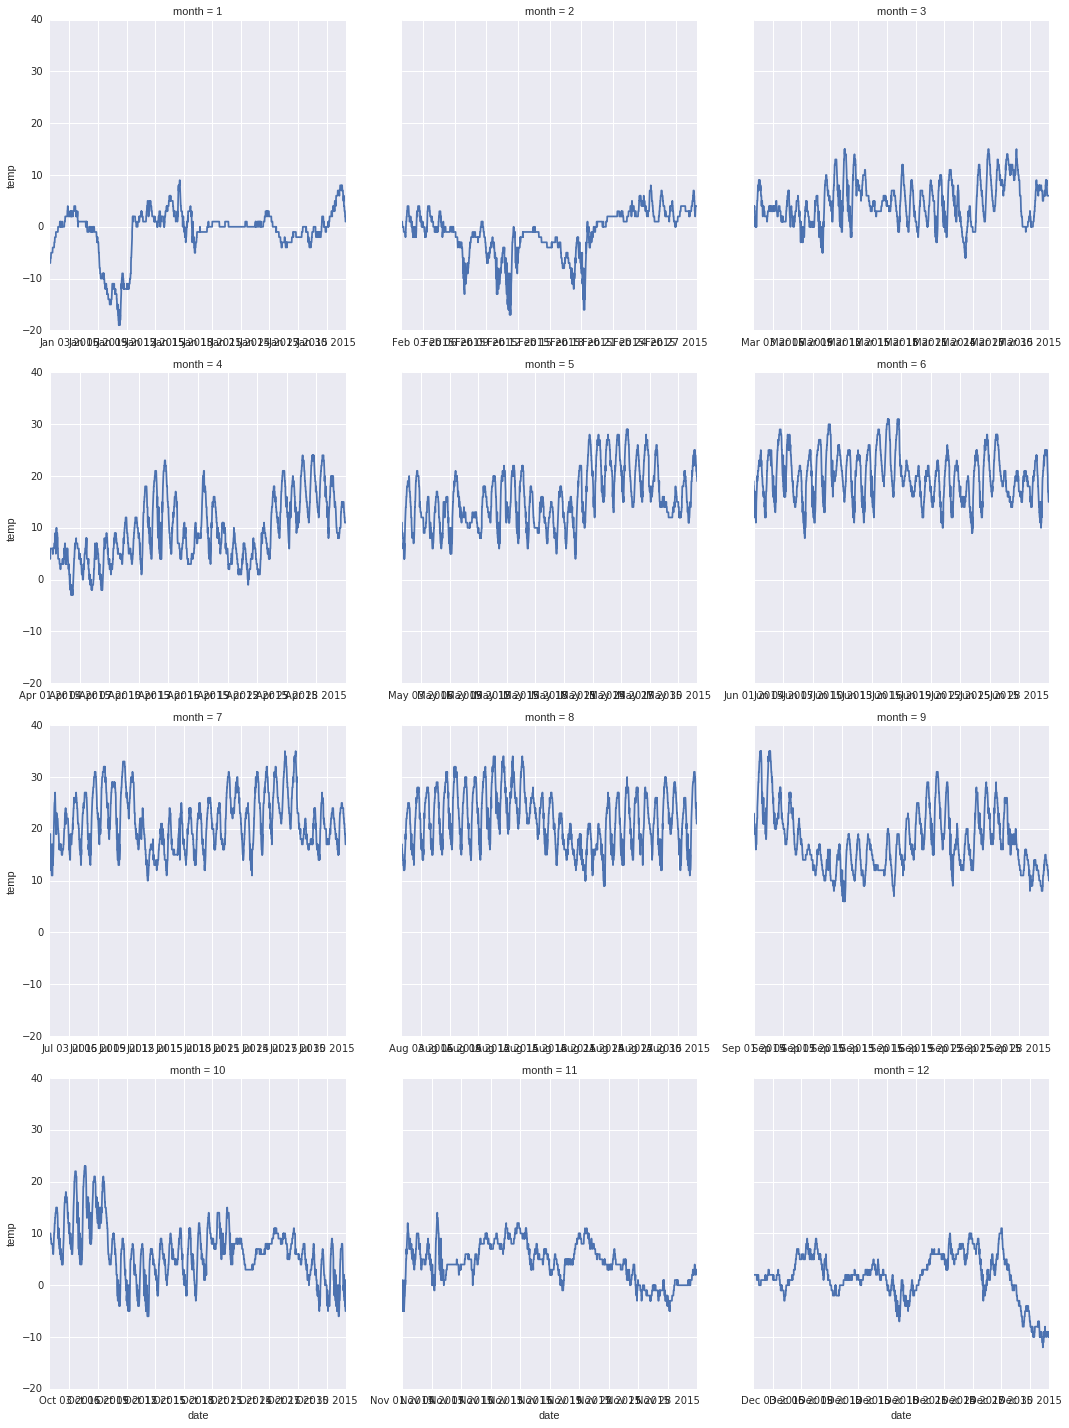

In [36]:
g = sns.FacetGrid(weather, col = 'month', sharex = False, col_wrap=3, size=5)
g = g.map(plt.plot, 'date', 'temp')